<a href="https://colab.research.google.com/github/shrutisinha006/my_projects_24/blob/main/shruti_sinha_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [734]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [735]:
df=pd.read_csv('/content/drive/My Drive/Datasets/Banglore_traffic_Dataset.csv')
df

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,No
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,No
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,No
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,No


we import the important libraries and the dataset.

understanding the dataset:

road/intersection name : Specific road or junction monitored,

Traffic volume:Total number of vehicles passing through the intersection (daily count),

Average Speed :	Mean speed of vehicles (in km/h),

Travel Time Index :	Ratio of actual travel time to free-flow travel time,

Congestion Level: Percentage of road capacity utilized (0-100%),

Road Capacity Utilization	: How much of the road’s design capacity is being used (%),

Incident Reports :Count of reported traffic incidents (accidents, breakdowns),

Environmental Impact : Pollution/emissions metric (higher = worse),

Public Transport Usage :Estimated number of public transport users,

Traffic Signal Compliance :	Percentage of vehicles obeying traffic signals ,

Parking Usage	Occupancy: rate of parking spaces near the intersection (%),

Pedestrian and Cyclist Count :Estimated number of pedestrians/cyclists,

Weather Conditions:Observed weather


In [736]:
# checking the null values in the dataset

df.isnull().sum()

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [737]:
# checking the descricription of the dataset

df.describe()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348
std,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573
min,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000
25%,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000
50%,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000
75%,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000
max,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000


In [738]:
# checking datatype for each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

The target variable is congestion level.

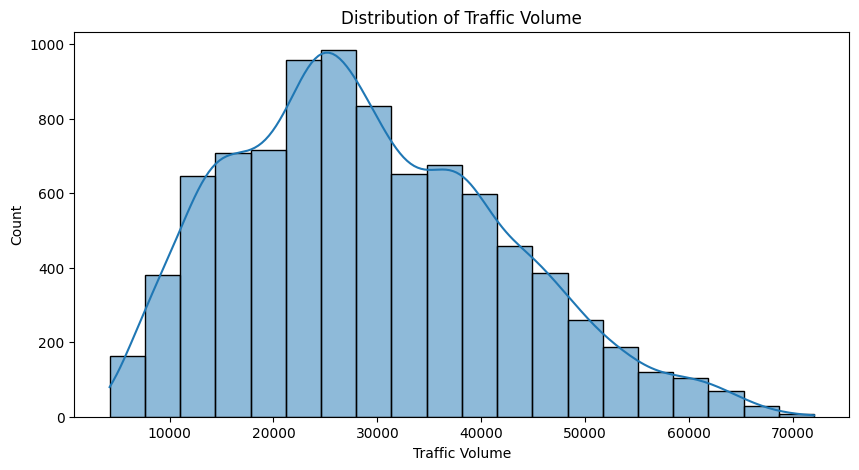

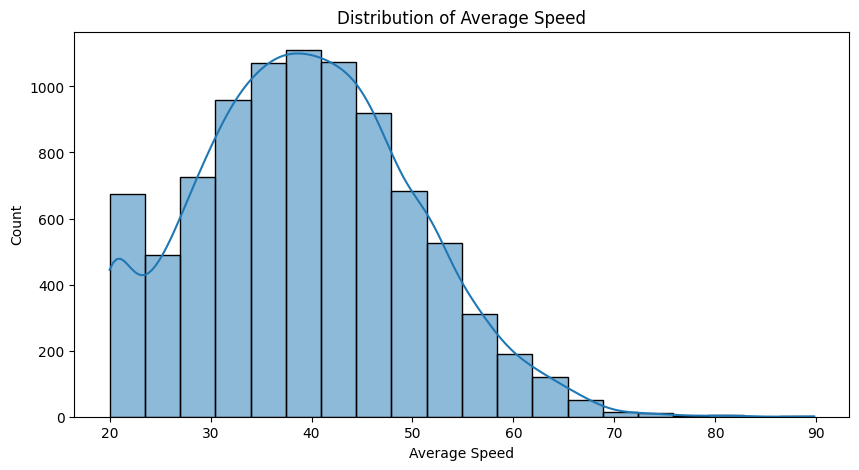

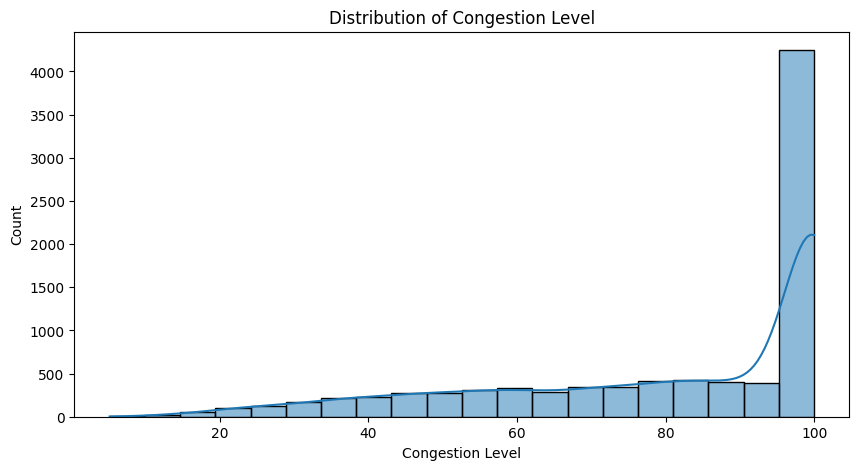

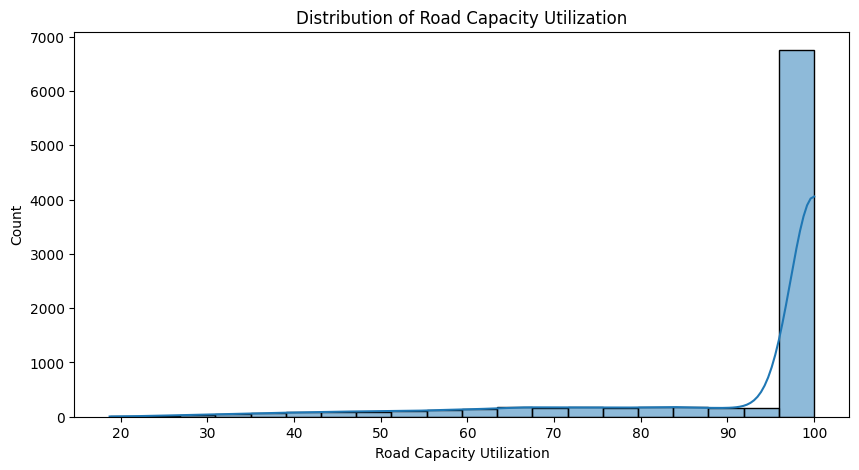

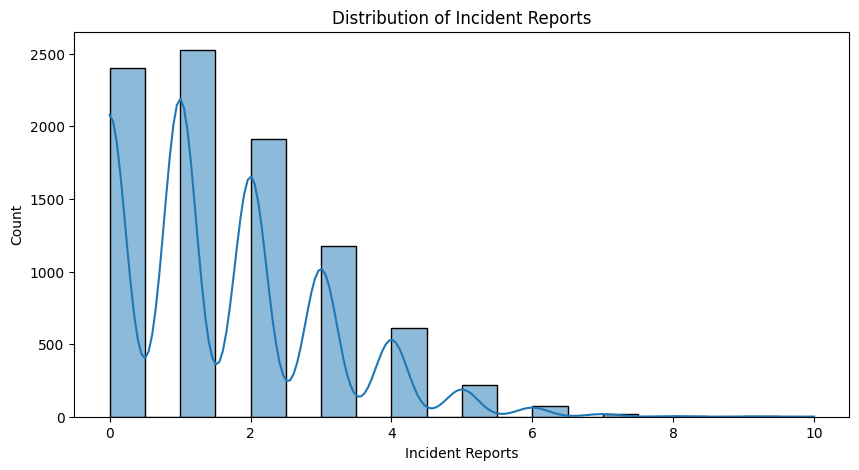

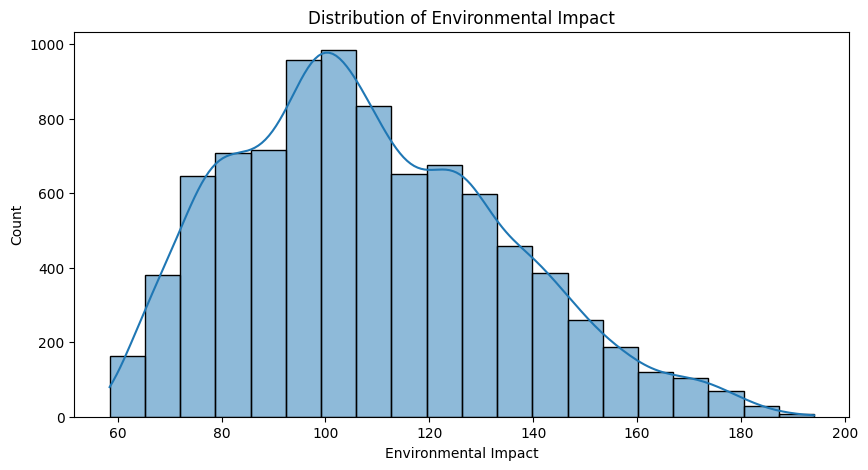

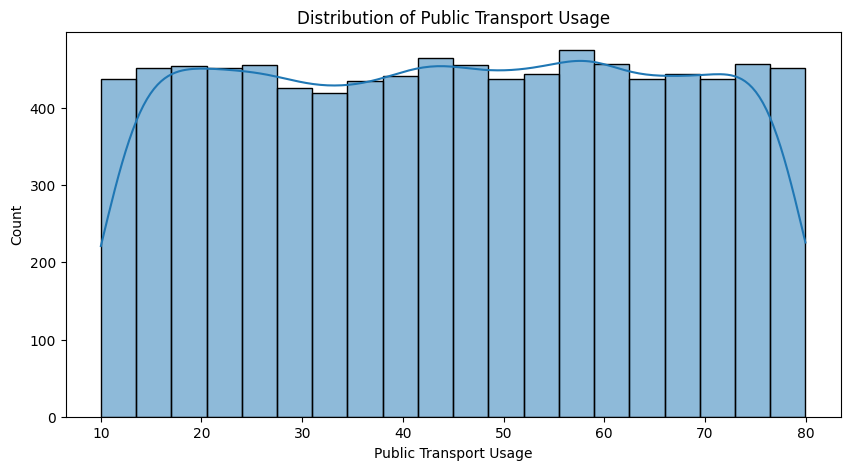

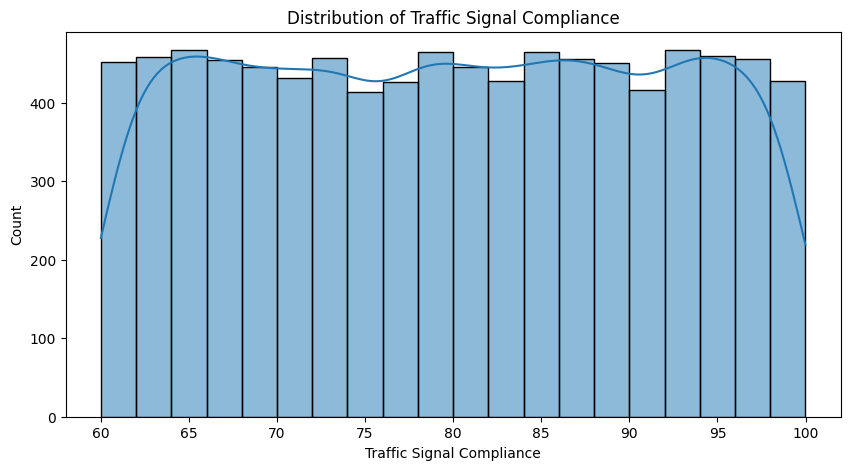

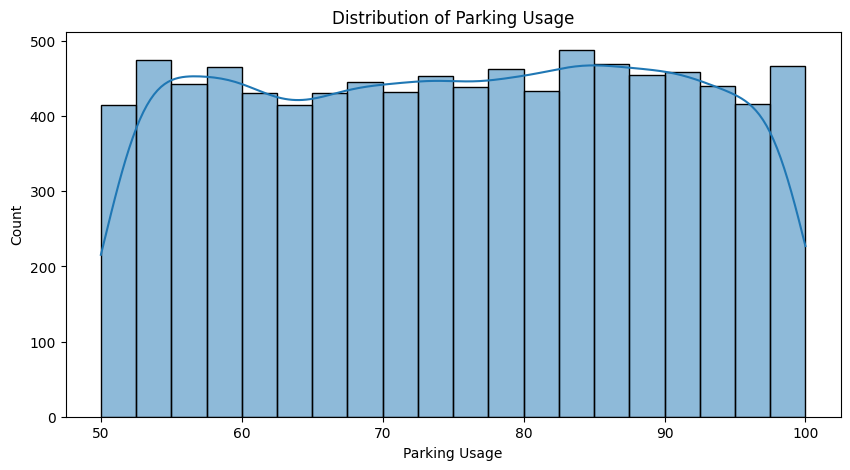

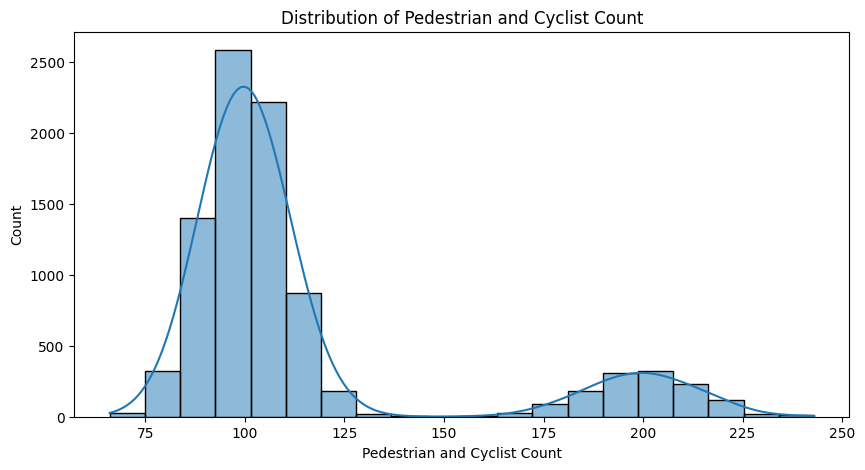

In [739]:

## Key Metrics Distribution
def plot_distribution(metric, bins=20):
    plt.figure(figsize=(10, 5))
    sns.histplot(df[metric], bins=bins, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.show()

plot_distribution('Traffic Volume')
plot_distribution('Average Speed')
plot_distribution('Congestion Level')
plot_distribution('Road Capacity Utilization')
plot_distribution('Incident Reports')
plot_distribution('Environmental Impact')
plot_distribution('Public Transport Usage')
plot_distribution('Traffic Signal Compliance')
plot_distribution('Parking Usage')
plot_distribution('Pedestrian and Cyclist Count')



In [740]:
# the no of rows and cols in the dataset
df.shape

(8936, 16)

In [741]:
#checking duplicates
df.duplicated().sum()*100

np.int64(0)

In [742]:
#checking correlation between numeri cols
df.corr(numeric_only=True)

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
Traffic Volume,1.000000,-0.341138,0.697514,0.837218,0.652898,0.338766,1.000000,-0.001160,0.005035,-0.025828,-0.554718
Average Speed,-0.341138,1.000000,-0.376170,-0.360250,-0.249886,-0.158863,-0.341138,0.024437,0.000644,0.000161,0.209209
Travel Time Index,0.697514,-0.376170,1.000000,0.751573,0.507774,0.322942,0.697514,-0.002011,-0.001240,-0.022570,-0.422007
Congestion Level,0.837218,-0.360250,0.751573,1.000000,0.865025,0.418284,0.837218,-0.002783,0.001810,-0.025815,-0.738787
Road Capacity Utilization,0.652898,-0.249886,0.507774,0.865025,1.000000,0.349976,0.652898,0.000443,0.017135,-0.030358,-0.868422
Incident Reports,0.338766,-0.158863,0.322942,0.418284,0.349976,1.000000,0.338766,-0.003811,-0.003002,-0.016150,-0.289087
Environmental Impact,1.000000,-0.341138,0.697514,0.837218,0.652898,0.338766,1.000000,-0.001160,0.005035,-0.025828,-0.554718
Public Transport Usage,-0.001160,0.024437,-0.002011,-0.002783,0.000443,-0.003811,-0.001160,1.000000,-0.012765,0.017501,0.002481
Traffic Signal Compliance,0.005035,0.000644,-0.001240,0.001810,0.017135,-0.003002,0.005035,-0.012765,1.000000,0.010235,-0.009513
Parking Usage,-0.025828,0.000161,-0.022570,-0.025815,-0.030358,-0.016150,-0.025828,0.017501,0.010235,1.000000,0.031148


In [743]:
df.corr(numeric_only=True)['Congestion Level']

,Congestion Level
Traffic Volume,0.837218
Average Speed,-0.360250
Travel Time Index,0.751573
Congestion Level,1.000000
Road Capacity Utilization,0.865025
Incident Reports,0.418284
Environmental Impact,0.837218
Public Transport Usage,-0.002783
Traffic Signal Compliance,0.001810
Parking Usage,-0.025815


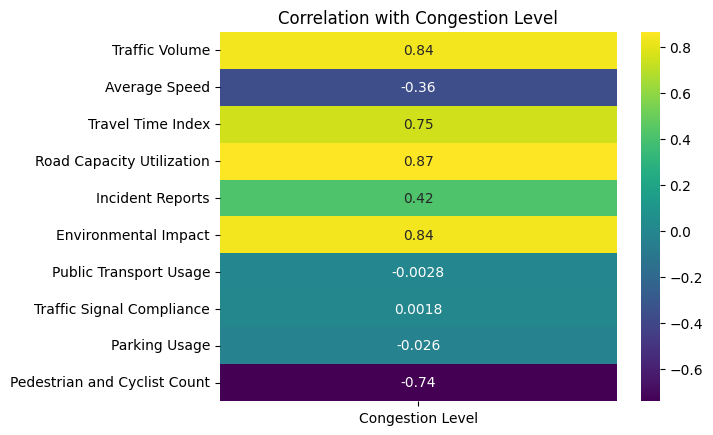

In [744]:
# Select numerical columns
numerical_cols = df.select_dtypes(include='number')

# Calculate correlation
corr_matrix = numerical_cols.corr()

# Optional: Filter only correlation with congestion_level
corr_with_congestion = corr_matrix[['Congestion Level']].drop('Congestion Level')

sns.heatmap(corr_with_congestion, annot=True, cmap='viridis')
plt.title('Correlation with Congestion Level')
plt.show()

,count
Weather Conditions,
Clear,5426
Overcast,1296
Fog,959
Rain,827
Windy,428


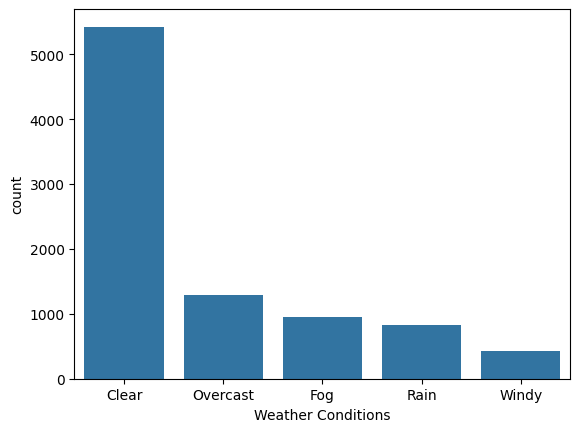

In [745]:
# for the categorical features

#1) weather condition:
sns.countplot(df,x='Weather Conditions')
df['Weather Conditions'].value_counts()

,count
Road/Intersection Name,
100 Feet Road,860
CMH Road,860
Anil Kumble Circle,759
Trinity Circle,742
Sony World Junction,684
Sarjapur Road,680
South End Circle,593
Jayanagar 4th Block,580
Marathahalli Bridge,492


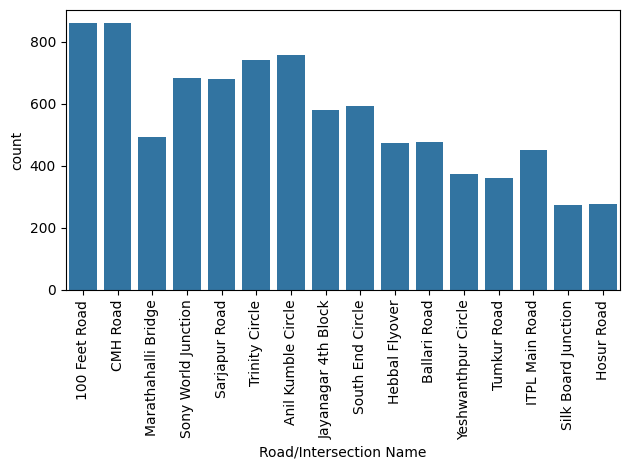

In [746]:
# 2)Road name

sns.countplot(df,x=  'Road/Intersection Name')
plt.xticks(rotation=90)
plt.tight_layout()

df['Road/Intersection Name'].value_counts()

,count
Area Name,
Indiranagar,1720
M.G. Road,1501
Koramangala,1364
Jayanagar,1173
Hebbal,950
Whitefield,942
Yeshwanthpur,734
Electronic City,552


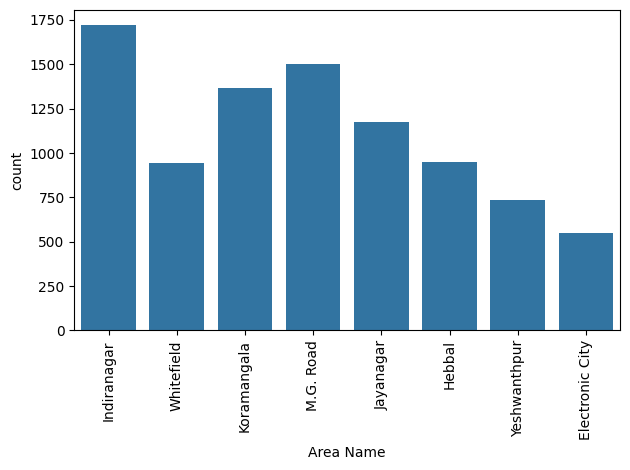

In [747]:
# 3) Area Name
sns.countplot(df,x=  'Area Name')
df['Area Name'].value_counts()
plt.xticks(rotation=90)
plt.tight_layout()

df['Area Name'].value_counts()

,count
Roadwork and Construction Activity,
No,8054
Yes,882


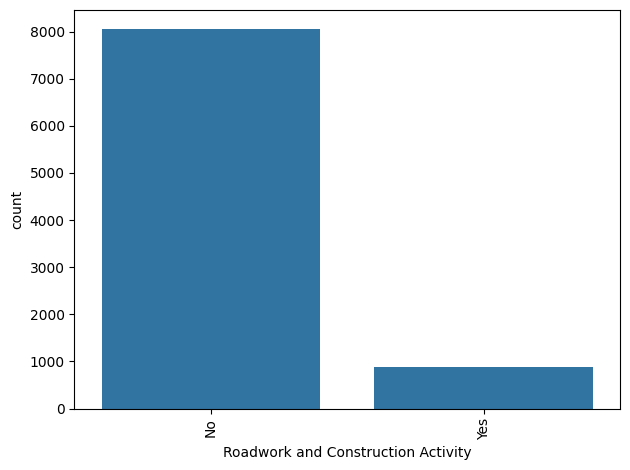

In [748]:
# 4)Roadwork and Construction Activity
sns.countplot(df,x=  'Roadwork and Construction Activity')
df['Roadwork and Construction Activity'].value_counts()
plt.xticks(rotation=90)
plt.tight_layout()

df['Roadwork and Construction Activity'].value_counts()

In [749]:
# changing the datatype of date from object to datetime
df['Date']=pd.DatetimeIndex(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                8936 non-null   datetime64[ns]
 1   Area Name                           8936 non-null   object        
 2   Road/Intersection Name              8936 non-null   object        
 3   Traffic Volume                      8936 non-null   int64         
 4   Average Speed                       8936 non-null   float64       
 5   Travel Time Index                   8936 non-null   float64       
 6   Congestion Level                    8936 non-null   float64       
 7   Road Capacity Utilization           8936 non-null   float64       
 8   Incident Reports                    8936 non-null   int64         
 9   Environmental Impact                8936 non-null   float64       
 10  Public Transport Usage  

In [750]:
# extract day of the week

df['day_of_week']=df['Date'].dt.day_name()

# extract year

df['year']=df['Date'].dt.year
df['year'].value_counts()


,count
year,
2022,3424
2023,3413
2024,2099


In [751]:
# removing the irrelevant column

df.drop(['Date'],axis=1,inplace=True)
df.head()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,day_of_week,year
0,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,Saturday,2022
1,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No,Saturday,2022
2,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No,Saturday,2022
3,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No,Saturday,2022
4,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No,Saturday,2022


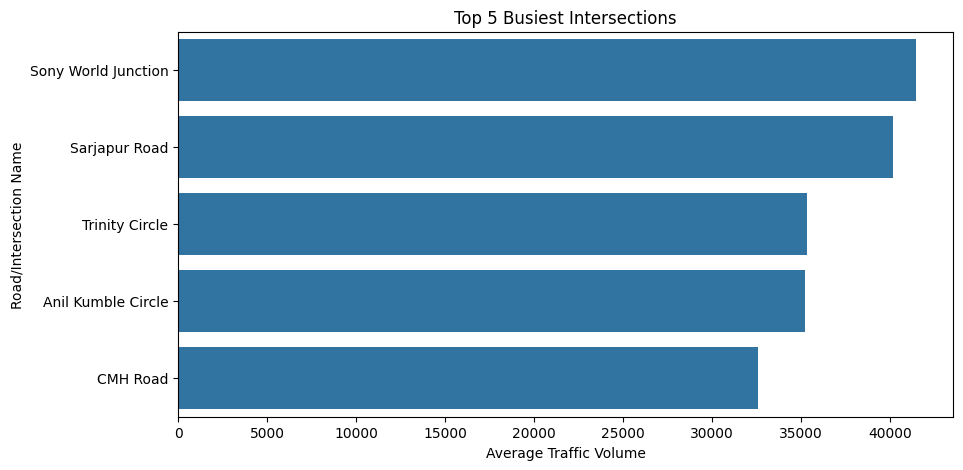

In [752]:
# some major visualisations

# intersection performance comparision

# Top 5 busiest intersections
top_intersections = df.groupby('Road/Intersection Name')['Traffic Volume'].mean().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_intersections.values, y=top_intersections.index)
plt.title('Top 5 Busiest Intersections')
plt.xlabel('Average Traffic Volume')
plt.show()

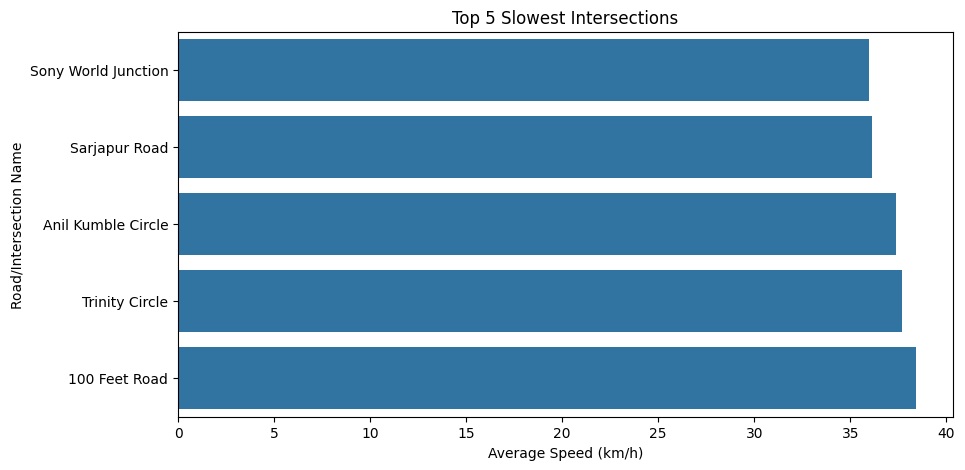

In [753]:
# top 5 speed intersections
slow_intersections = df.groupby('Road/Intersection Name')['Average Speed'].mean().nsmallest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=slow_intersections.values, y=slow_intersections.index)
plt.title('Top 5 Slowest Intersections')
plt.xlabel('Average Speed (km/h)')
plt.show()

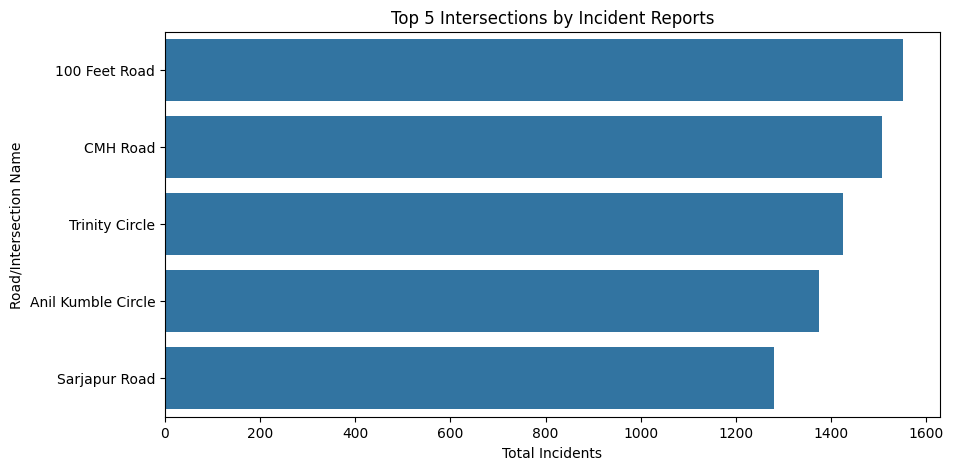

In [754]:
##  Incident Analysis
# Intersections with most incidents
incident_counts = df.groupby('Road/Intersection Name')['Incident Reports'].sum().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=incident_counts.values, y=incident_counts.index)
plt.title('Top 5 Intersections by Incident Reports')
plt.xlabel('Total Incidents')
plt.show()

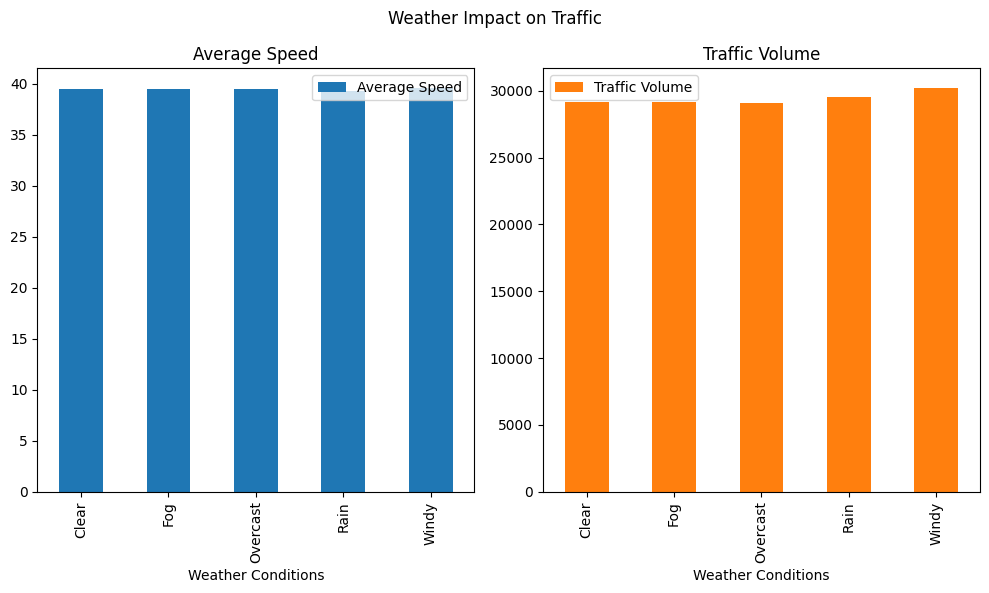

In [755]:
##  Weather Impact
weather_impact = df.groupby('Weather Conditions')[['Average Speed', 'Traffic Volume']].mean()
weather_impact.plot(kind='bar', subplots=True, figsize=(10, 6), layout=(1, 2))
plt.suptitle('Weather Impact on Traffic')
plt.tight_layout()
plt.show()

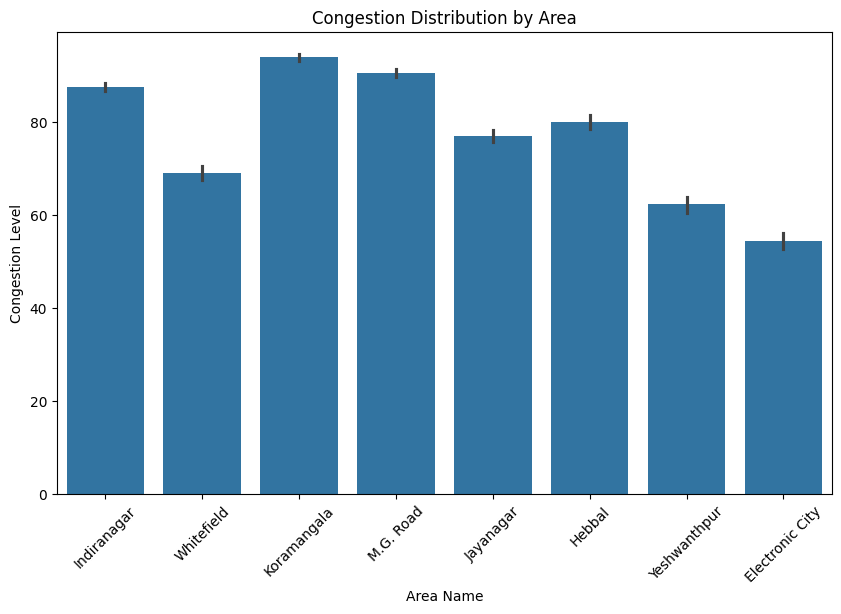

In [756]:
# congestion by area

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Area Name', y='Congestion Level')
plt.xticks(rotation=45)
plt.title("Congestion Distribution by Area")
plt.show()

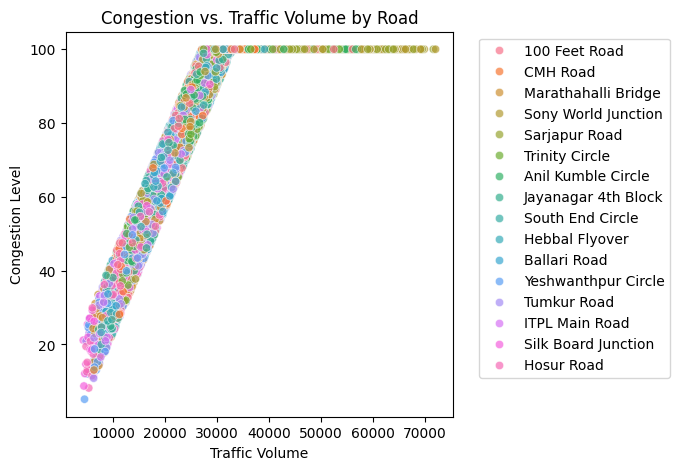

In [757]:


# congestion by traffic volume by roads

plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=df,
    x='Traffic Volume',
    y='Congestion Level',
    hue='Road/Intersection Name',
    alpha=0.7
)
plt.title("Congestion vs. Traffic Volume by Road")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

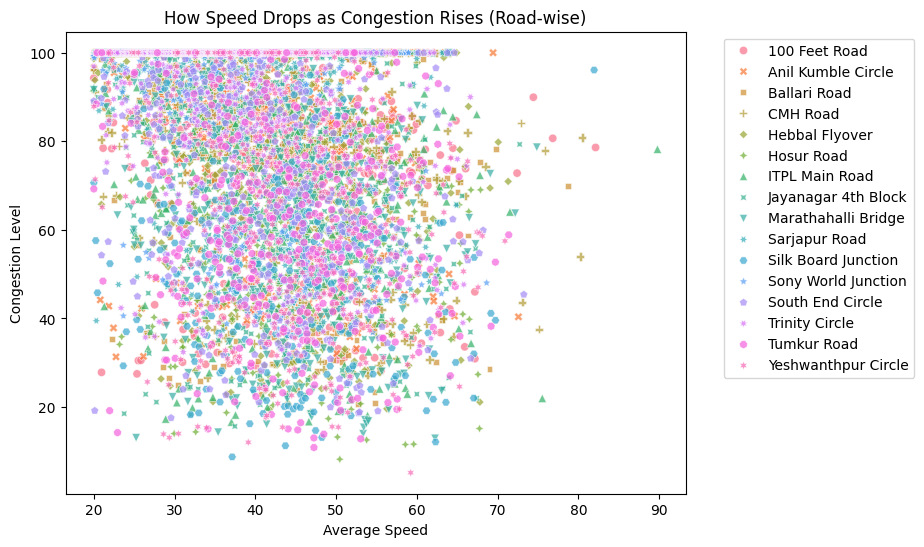

In [758]:
# average speed vs congestion level for each roads
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df.groupby(['Road/Intersection Name', 'Average Speed'])['Congestion Level'].mean().reset_index(),
    x='Average Speed',
    y='Congestion Level',
    hue='Road/Intersection Name',
    style='Road/Intersection Name',
    alpha=0.7
)
plt.title("How Speed Drops as Congestion Rises (Road-wise)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

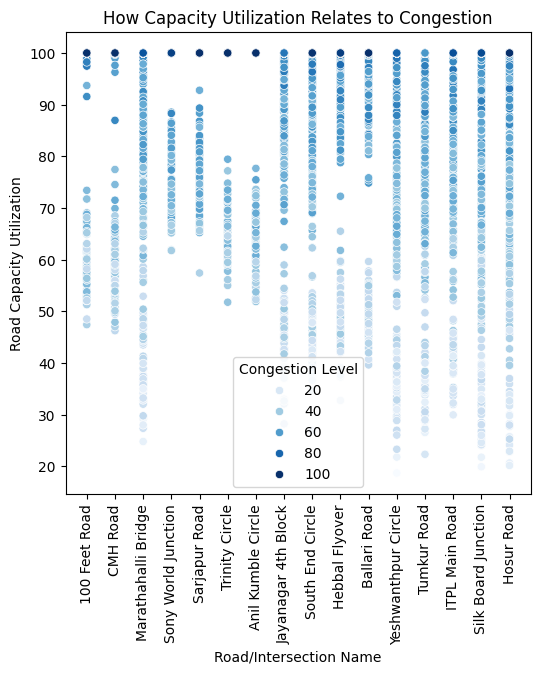

In [759]:
#Capacity Utilization Relates to Congestion
plt.figure(figsize=(6, 6))
sns.scatterplot(
    data=df,
    x='Road/Intersection Name',
    y='Road Capacity Utilization',
    hue='Congestion Level',
    palette='Blues'
)
plt.xticks(rotation=90)
plt.title("How Capacity Utilization Relates to Congestion")
plt.show()

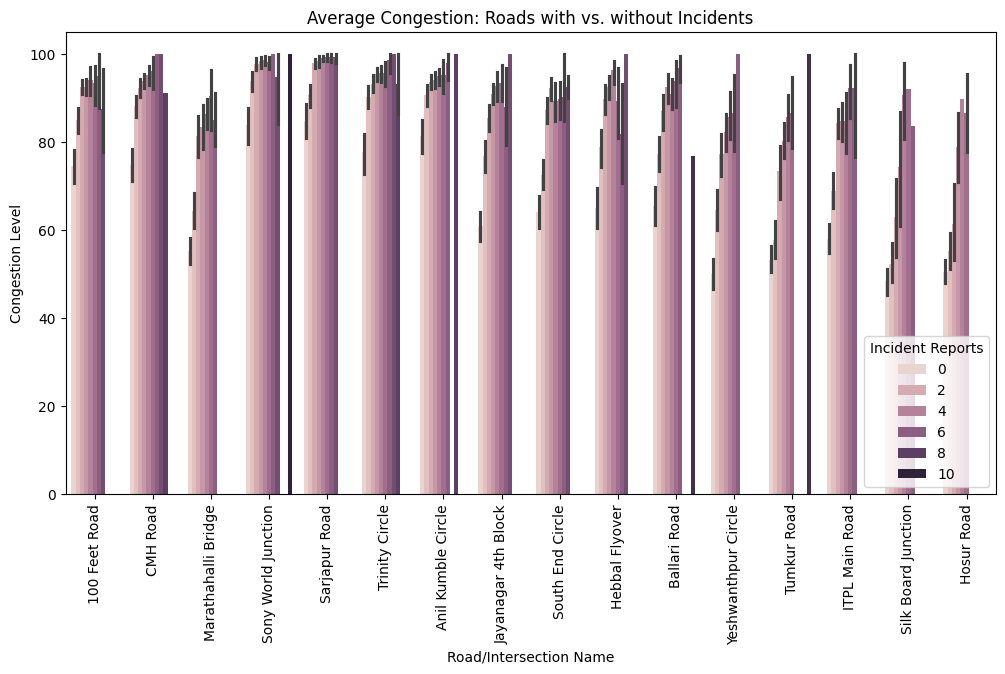

In [760]:
# congestion wrt incidents on intersections
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='Road/Intersection Name',
    y='Congestion Level',
    hue='Incident Reports',

)
plt.xticks(rotation=90)
plt.title("Average Congestion: Roads with vs. without Incidents")
plt.show()

In [761]:
# comparision of clear weather and other weather conditions on the congestion levels

df['Weather Conditions'].value_counts()


,count
Weather Conditions,
Clear,5426
Overcast,1296
Fog,959
Rain,827
Windy,428


In [762]:
def encode_weather_name(weather_condition):
    if weather_condition.lower() == 'clear':
        return 1
    else:
        return 0

df['weather_condition'] = df['Weather Conditions'].apply(encode_weather_name)
df.tail()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,day_of_week,year,weather_condition
8931,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,No,Friday,2024,0
8932,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,No,Friday,2024,1
8933,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,No,Friday,2024,1
8934,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,No,Friday,2024,1
8935,Yeshwanthpur,Yeshwanthpur Circle,14705,31.128967,1.048720,43.409821,77.734621,1,79.410,26.616725,80.778753,60.602672,201,Rain,No,Friday,2024,0


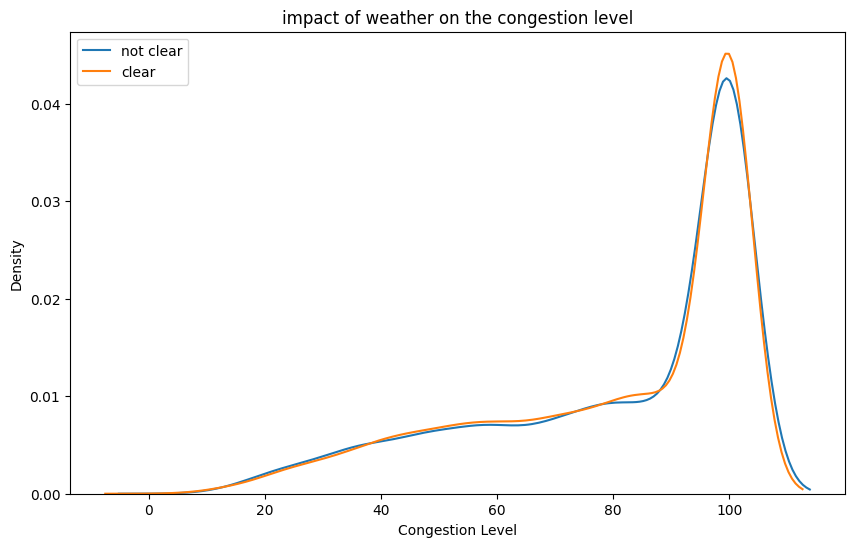

In [763]:
# plot of weather impacts

plt.figure(figsize=(10,6))
sns.kdeplot(x=df[df['weather_condition']==0]['Congestion Level'],label='not clear')
sns.kdeplot(x=df[df['weather_condition']==1]['Congestion Level'],label='clear')
plt.title('impact of weather on the congestion level')
plt.legend()
plt.show()

In [764]:
# compare the congestion with and without incidents

df['Incident Reports'].value_counts()

,count
Incident Reports,
1,2525
0,2399
2,1910
3,1175
4,611
5,216
6,72
7,21
8,4


In [765]:
no_incident=df[df['Incident Reports']==0]
incident_days=df[df['Incident Reports']>0]

In [766]:

print("Congestion Comparision")
print('With incidents',incident_days['Congestion Level'].mean())
print('withour incidents',no_incident['Congestion Level'].mean())

Congestion Comparision
With incidents 86.5961590753008
withour incidents 65.07333061328168


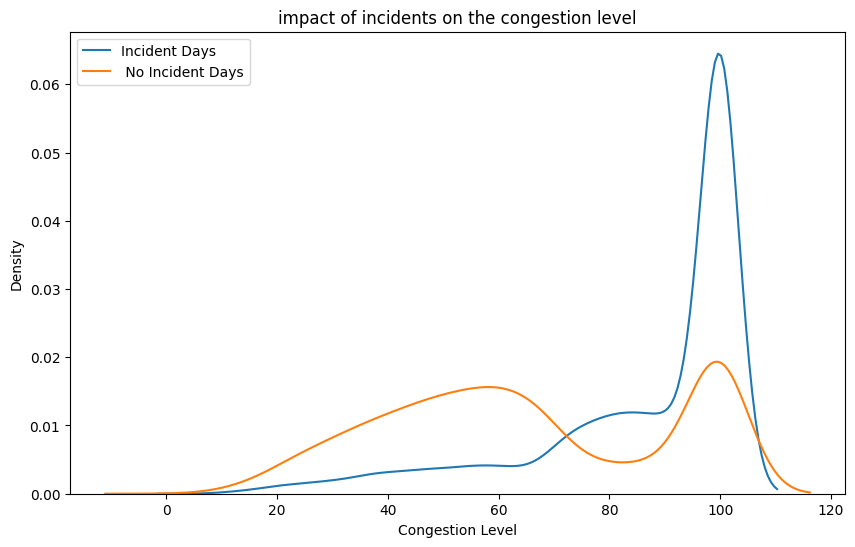

In [767]:
# plot of incident impacts

plt.figure(figsize=(10,6))
sns.kdeplot(x=incident_days['Congestion Level'],label='Incident Days')
sns.kdeplot(x=no_incident['Congestion Level'],label=' No Incident Days')
plt.title('impact of incidents on the congestion level')
plt.legend()
plt.show()

we can interpret from the above that the if the incidents occur then the congestion level increses.

In [768]:

# here my target variable is the congestion level i.e this is my output column.
df.drop(['Weather Conditions'],axis=1,inplace=True)
df.head()


,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity,day_of_week,year,weather_condition
0,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,No,Saturday,2022,1
1,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,No,Saturday,2022,1
2,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,No,Saturday,2022,1
3,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,No,Saturday,2022,1
4,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,No,Saturday,2022,1


In [769]:
# encoding the categorical values using column transformer for nominal categories

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [770]:
    cat_cols=['Area Name','Road/Intersection Name','Roadwork and Construction Activity','day_of_week']
    num_cols=['Traffic Volume','Average Speed','Travel Time Index','Road Capacity Utilization','Incident Reports','Public Transport Usage','Traffic Signal Compliance','Parking Usage','Pedestrian and Cyclist Count']

In [771]:
cat_cols

['Area Name',
 'Road/Intersection Name',
 'Roadwork and Construction Activity',
 'day_of_week']

In [772]:
num_cols

['Traffic Volume',
 'Average Speed',
 'Travel Time Index',
 'Road Capacity Utilization',
 'Incident Reports',
 'Public Transport Usage',
 'Traffic Signal Compliance',
 'Parking Usage',
 'Pedestrian and Cyclist Count']

In [773]:
transformer=ColumnTransformer(
    # since no missing value is present here.
   transformers= [('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore',drop='first'), cat_cols)]
,remainder='passthrough')

In [774]:
# train test split
from sklearn.model_selection import train_test_split,cross_val_score
x=df.drop(columns=['Congestion Level','Environmental Impact'],axis=1)
y=df['Congestion Level']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)


In [775]:
x_train

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity,day_of_week,year,weather_condition
3974,Koramangala,Sarjapur Road,61404,20.948481,1.500000,100.000000,2,29.086187,86.119747,64.996668,83,No,Wednesday,2023,0
5744,Yeshwanthpur,Yeshwanthpur Circle,24764,44.377441,1.171253,100.000000,2,27.596696,76.496315,80.986891,99,No,Thursday,2023,1
1411,Yeshwanthpur,Yeshwanthpur Circle,14614,45.442062,1.086997,75.213425,1,31.029413,62.309451,68.577350,202,No,Tuesday,2022,0
2881,M.G. Road,Anil Kumble Circle,40664,41.964813,1.500000,100.000000,2,32.794242,82.263476,58.632574,105,No,Wednesday,2022,1
6695,Koramangala,Sony World Junction,57658,36.556843,1.500000,100.000000,1,32.681566,84.453160,92.653436,94,No,Sunday,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,Hebbal,Hebbal Flyover,9443,32.162796,1.058334,43.333620,0,10.511638,82.566550,78.747572,186,No,Sunday,2024,0
3603,M.G. Road,Trinity Circle,54667,20.971542,1.500000,100.000000,3,41.453862,71.286412,92.715049,113,No,Friday,2023,0
5959,Jayanagar,Jayanagar 4th Block,33999,49.174702,1.500000,100.000000,2,62.591237,87.238377,60.879050,104,No,Saturday,2023,1
5426,Indiranagar,CMH Road,10830,48.393182,1.367971,49.919749,1,29.166762,72.053641,67.839482,212,No,Saturday,2023,1


In [776]:
x_test

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Roadwork and Construction Activity,day_of_week,year,weather_condition
3940,Jayanagar,South End Circle,20054,37.556128,1.289159,96.154409,1,16.410622,76.546548,93.874141,96,No,Saturday,2023,0
3407,Indiranagar,CMH Road,23779,51.267858,1.315830,100.000000,0,65.841961,90.500147,58.458208,92,No,Friday,2022,0
3442,Indiranagar,CMH Road,32720,40.223086,1.500000,100.000000,1,57.503355,96.064171,56.104981,103,No,Tuesday,2023,1
4448,Hebbal,Hebbal Flyover,40697,39.741468,1.500000,100.000000,2,15.908882,74.677347,76.901130,87,No,Saturday,2023,1
355,M.G. Road,Anil Kumble Circle,37493,24.927501,1.500000,100.000000,4,18.433728,94.061487,57.830641,84,No,Tuesday,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,Jayanagar,Jayanagar 4th Block,25888,39.023366,1.500000,100.000000,2,24.898275,97.551772,90.292998,92,No,Sunday,2023,1
2701,Koramangala,Sony World Junction,46306,32.886618,1.500000,100.000000,0,15.480367,79.925258,88.267188,86,No,Friday,2022,1
6466,Yeshwanthpur,Tumkur Road,13922,35.609235,1.030512,68.458395,1,40.204789,65.351403,66.224851,186,No,Wednesday,2023,0
4368,M.G. Road,Anil Kumble Circle,38529,29.926926,1.500000,100.000000,0,24.527118,64.385581,63.881665,89,No,Thursday,2023,0


In [777]:
y_train

,Congestion Level
3974,100.000000
5744,82.737059
1411,58.431410
2881,100.000000
6695,100.000000
...,...
7839,37.226659
3603,100.000000
5959,100.000000
5426,28.548393


In [778]:
x_train_transformed=transformer.fit_transform(x_train)
x_test_transformed=transformer.transform(x_test)

In [779]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

MODEL SUMMARY

In [780]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_pred=lr.predict(x_test_transformed)

In [781]:
#Predict r2 score for the test dataset
r2=r2_score(y_test,y_pred)
print(r2)

0.9143503479261499


In [782]:
mean_absolute_error(y_test,y_pred)

5.360531742916548

In [783]:

lr_mse=np.sqrt(mean_squared_error(y_test,y_pred))

In [784]:
mean_squared_error(y_test,y_pred)

46.248569946162824

In [785]:
cv=cross_val_score(lr, x_train_transformed, y_train , cv=10,scoring='r2')

In [786]:
print(cv)

[0.91755273 0.91963556 0.92430424 0.93053656 0.91479532 0.91812131
 0.91560915 0.9258303  0.90928226 0.92308922]


In [787]:
lr.coef_

array([ 6.76959067, -0.58687325,  5.99318   , 12.29966338,  1.08185911,
        0.02769053, -0.20751782,  0.10556905,  0.08830185,  0.75999099,
        1.57671463,  0.34641895, -0.01703942,  0.67727204,  0.04500517,
       -0.46119933,  0.37707441,  0.09559015,  0.48128996,  0.66440085,
       -1.77639695,  0.25147745,  0.13104741, -0.20647228,  0.18215855,
       -1.15076608, -0.19919797,  0.21537154,  0.30019763, -0.96512205,
        0.50392272,  0.2192767 , -0.44226662, -0.5012167 , -0.15029835,
       -0.50486955, -0.507038  , -0.46567564,  0.1797158 ,  0.04346208])

In [788]:
lr.intercept_

np.float64(-282.9328890512531)

In [789]:
from sklearn.metrics import r2_score

# Predict on training data
y_train_pred = lr.predict(x_train_transformed)

# Calculate R² for training data
r2_train = r2_score(y_train, y_train_pred)
print("Training R² Score:", r2_train)

Training R² Score: 0.9211279341256746


since there is no case of overfitting as there are no major difference in the r2_score of the test and train dataset.

In [790]:
# residuals

residuals=y_test-y_pred


In [791]:

# statistical significance

import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train_transformed)  # Adds intercept
model_sm = sm.OLS(y_train, x_train_sm).fit()
print(model_sm.summary())  # Look for 'P>|t|' column (p-values)

                            OLS Regression Results                            
Dep. Variable:       Congestion Level   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     2518.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        05:10:56   Log-Likelihood:                -23663.
No. Observations:                7148   AIC:                         4.739e+04
Df Residuals:                    7114   BIC:                         4.763e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -247.5663    180.313     -1.373      0.1

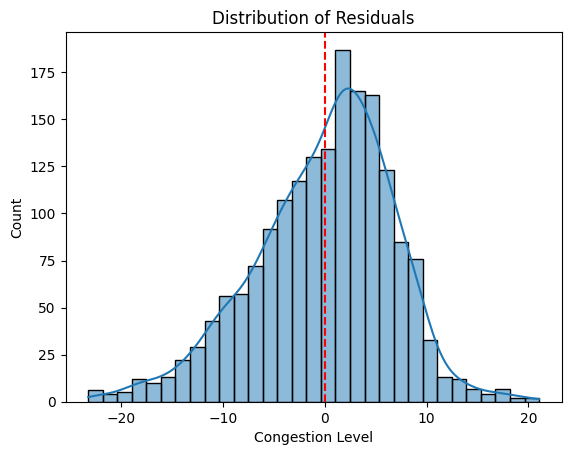

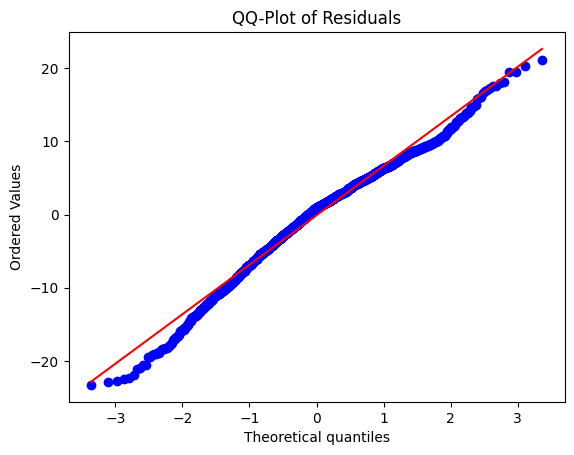

In [792]:


import seaborn as sns
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title("Distribution of Residuals")
plt.show()

from scipy.stats import probplot
probplot(residuals, plot=plt)
plt.title("QQ-Plot of Residuals")
plt.show()

This shows that there is no potential outliers.

In [793]:
# 1. Check data types
print(x_train.dtypes)

# 2. Convert non-numeric columns if needed
x_train = x_train.select_dtypes(include=['number'])

# 3. Check for infinite or missing values
print(x_train.isnull().sum())
print(np.isinf(x_train).sum())

# 4. Drop or impute problematic columns
x_train = x_train.replace([np.inf, -np.inf], np.nan).dropna(axis=1)


Area Name                              object
Road/Intersection Name                 object
Traffic Volume                          int64
Average Speed                         float64
Travel Time Index                     float64
Road Capacity Utilization             float64
Incident Reports                        int64
Public Transport Usage                float64
Traffic Signal Compliance             float64
Parking Usage                         float64
Pedestrian and Cyclist Count            int64
Roadwork and Construction Activity     object
day_of_week                            object
year                                    int32
weather_condition                       int64
dtype: object
Traffic Volume                  0
Average Speed                   0
Travel Time Index               0
Road Capacity Utilization       0
Incident Reports                0
Public Transport Usage          0
Traffic Signal Compliance       0
Parking Usage                   0
Pedestrian and Cyclist C

In [794]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select numeric features only
numeric_data = x_train.select_dtypes(include=['number'])

# Drop constant columns and check for nans
numeric_data = numeric_data.loc[:, numeric_data.nunique() > 1].dropna(axis=1)

# Add intercept term
X_with_const = add_constant(numeric_data)

# Calculate VIF safely
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

# Replace infinite values with a large number or NaN
vif_data["VIF"] = vif_data["VIF"].replace([np.inf, -np.inf], np.nan)

# Sort and display all results
print(vif_data.sort_values("VIF", ascending=False).dropna())

                         feature           VIF
0                          const  6.855735e+06
4      Road Capacity Utilization  5.053410e+00
9   Pedestrian and Cyclist Count  4.096637e+00
1                 Traffic Volume  2.591569e+00
3              Travel Time Index  2.079837e+00
2                  Average Speed  1.184845e+00
5               Incident Reports  1.184369e+00
8                  Parking Usage  1.002500e+00
10                          year  1.001897e+00
7      Traffic Signal Compliance  1.001542e+00
6         Public Transport Usage  1.001449e+00
11             weather_condition  1.001223e+00


hecne , the data is free from multicollinearity

In [795]:
x_train[['Road Capacity Utilization','Traffic Volume']].corr()

,Road Capacity Utilization,Traffic Volume
Road Capacity Utilization,1.00000,0.65509
Traffic Volume,0.65509,1.00000


In [796]:
x_train[['Pedestrian and Cyclist Count','Traffic Volume']].corr()

,Pedestrian and Cyclist Count,Traffic Volume
Pedestrian and Cyclist Count,1.000000,-0.557051
Traffic Volume,-0.557051,1.000000


REGULARISAION

In [797]:
from sklearn.linear_model import Ridge

In [798]:

# Define range of alpha values to test
alphas = np.logspace(-6, 6, 200)

train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_transformed, y_train)

    # Training score
    y_train_pred = ridge.predict(x_train_transformed)
    train_scores.append(mean_squared_error(y_train, y_train_pred))

    # Test score
    y_test_pred = ridge.predict(x_test_transformed)
    test_scores.append(mean_squared_error(y_test, y_test_pred))

In [799]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alphas).fit(x_train_transformed, y_train)
print("Optimal alpha:", ridge_cv.alpha_)

Optimal alpha: 19.791668678535572


In [800]:
R=Ridge(alpha=19.79)
R.fit(x_train_transformed,y_train)

Ridge(alpha=19.79)

In [801]:
y_pred=R.predict(x_test_transformed)

In [802]:
r2_ridge=r2_score(y_test,y_pred)
print(r2_ridge)

0.9143910134079022


In [803]:
ridge_mse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE SCORE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE SCORE: 6.799015491273364


In [804]:
# THUS,THERE IS NO CASE OF OVERFITTING AND UNDERFITTING


In [805]:
# comparing the results with different models

In [806]:
#decision trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_transformed, y_train)

DecisionTreeRegressor(random_state=42)

In [807]:
y_pred = dt_model.predict(x_test_transformed)

In [808]:
from sklearn.metrics import mean_squared_error
r2_dt = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared (R²): {r2_dt:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared (R²): 0.94
MSE: 35.00
RMSE: 5.92


In [809]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [810]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(x_train_transformed, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [811]:
# 5. Predict
y_pred = rf_model.predict(x_test_transformed)

# 6. Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 19.247965583359615
R2 Score: 0.9643538912173224


In [812]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define param distributions
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,          # Try 20 random combinations
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=2,
    random_state=42
)

random_search.fit(x_train_transformed, y_train)
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [813]:
# Predict
y_pred = best_rf.predict(x_test_transformed)
r2_rf=r2_score(y_test, y_pred)

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 287}
MSE: 18.704062163396472
R2 Score: 0.9653611686041875


In [817]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge', 'Decision Tree', 'Random Forest'],
    'R2 Score': [r2, r2_ridge, r2_dt, r2_rf],

})
print(results)

               Model  R2 Score
0  Linear Regression  0.964354
1              Ridge  0.914391
2      Decision Tree  0.935174
3      Random Forest  0.965361


In [815]:
# Drop the actual congestion and any column that shouldn't be in features
X_all_roads = df.drop(columns=['Congestion Level', 'Environmental Impact'], errors='ignore')

# Transform using the fitted transformer
X_all_transformed = transformer.transform(X_all_roads)

# Predict congestion level using the trained model
predicted_congestion = rf_model.predict(X_all_transformed)

# Add predictions to the DataFrame
df['Predicted Congestion Level'] = predicted_congestion

# Group by road/intersection and get average predicted congestion per road
avg_predicted_congestion = df.groupby('Road/Intersection Name')['Predicted Congestion Level'] \
                             .mean().sort_values(ascending=False)

# Display results
print(" Average Predicted Congestion Level for Each Road/Intersection:\n")
print(avg_predicted_congestion)


 Average Predicted Congestion Level for Each Road/Intersection:

Road/Intersection Name
Sony World Junction    94.098519
Sarjapur Road          93.717441
Anil Kumble Circle     90.742815
Trinity Circle         90.320852
CMH Road               88.208298
100 Feet Road          87.057231
Hebbal Flyover         80.691153
Ballari Road           79.432149
South End Circle       77.375108
Jayanagar 4th Block    76.959793
ITPL Main Road         70.986790
Marathahalli Bridge    67.180827
Yeshwanthpur Circle    63.653687
Tumkur Road            61.068477
Hosur Road             54.850772
Silk Board Junction    53.546647
Name: Predicted Congestion Level, dtype: float64


In [816]:
# Sample congestion values for 16 roads
data = {
    'Sony World Junction':  94.196978,
   'Sarjapur Road'      :    93.848615,
   'Anil Kumble Circle'   :  90.617675,
   'Trinity Circle'       :  90.303099,
   'CMH Road'              : 88.251475,
   '100 Feet Road'         : 86.926418,
   'Hebbal Flyover'        : 80.847961,
   'Ballari Road'          : 79.544472,
   'South End Circle'      : 77.412225,
   'Jayanagar 4th Block'   : 77.025203,
   'ITPL Main Road'        : 70.992117,
   'Marathahalli Bridge'   : 67.291036,
   'Yeshwanthpur Circle'   : 63.941410,
   'Tumkur Road'           : 61.039758,
   'Hosur Road'            : 55.016601,
   'Silk Board Junction'   : 53.594620
}

# Convert to DataFrame
df = pd.DataFrame.from_dict(data, orient='index', columns=['Predicted Congestion'])

# Traffic light controller class
class TrafficLightController:
    def __init__(self, df, total_cycle_time=400, min_green_time=10, yellow_time=5):
        self.df = df.copy()
        self.total_cycle_time = total_cycle_time
        self.min_green_time = min_green_time
        self.yellow_time = yellow_time

    def calculate_timings(self):
        n = len(self.df)
        min_required_time = n * (self.min_green_time + self.yellow_time)

        if self.total_cycle_time < min_required_time:
            raise ValueError(f"Total cycle time too short. Minimum required = {min_required_time}s.")

        remaining_time = self.total_cycle_time - n * (self.min_green_time + self.yellow_time)

        congestion = self.df['Predicted Congestion']
        total_congestion = congestion.sum()

        if total_congestion == 0:
            extra_time = [0] * n
        else:
            extra_time = (congestion / total_congestion) * remaining_time

        self.df['Green Time'] = self.min_green_time + extra_time
        self.df['Yellow Time'] = self.yellow_time

    def display_timings(self):
        print(self.df[['Green Time', 'Yellow Time']])

# Run controller
controller = TrafficLightController(df, total_cycle_time=400, min_green_time=10, yellow_time=5)
controller.calculate_timings()
controller.display_timings()


                     Green Time  Yellow Time
Sony World Junction   22.244807            5
Sarjapur Road         22.199523            5
Anil Kumble Circle    21.779528            5
Trinity Circle        21.738636            5
CMH Road              21.471942            5
100 Feet Road         21.299696            5
Hebbal Flyover        20.509548            5
Ballari Road          20.340106            5
South End Circle      20.062932            5
Jayanagar 4th Block   20.012622            5
ITPL Main Road        19.228372            5
Marathahalli Bridge   18.747263            5
Yeshwanthpur Circle   18.311840            5
Tumkur Road           17.934650            5
Hosur Road            17.151691            5
Silk Board Junction   16.966845            5
